# K-Means Algorithm

In [156]:
import numpy as np
import pandas as pd
import random 
import matplotlib.pyplot as plt
from operator import truediv
from sklearn import datasets
pd.options.mode.chained_assignment = None 

In [157]:
iris= datasets.load_iris()
X=iris.data  
y= iris.target 
df = pd.DataFrame(data=iris.data, columns=["sepal_length", "sepal_width", "petal_length", "petal_width"]) 
df["class"] = iris.target

In [158]:
def data_cluster(K,X_saver,C):
    X_saver["Cluster"]=C
    df_new = X_saver[X_saver["Cluster"]==K]
    data_c=df_new[["sepal_length", "sepal_width", "petal_length", "petal_width"]]
    return data_c   


def Distance_cluster(X_saver):
    cost=[]
    cost_data=[]
    for idx1,row_1 in X_saver.iterrows():
        ED=[]
        for idx2,row_2 in X_saver.iterrows():
            d1=(row_1["sepal_length"]-row_2["sepal_length"])**2
            d2=(row_1["sepal_width"]-row_2["sepal_width"])**2
            d3=(row_1["petal_length"]-row_2["petal_length"])**2
            d4=(row_1["petal_width"]-row_2["petal_width"])**2
            d=np.sqrt(d1+d2+d3+d4)
            ED.append(d)
        cost_data.append(sum(ED))
    cost=0.5*sum(cost_data)
    return cost

In [159]:
def Kmeans_algorithm(K,X,iteration):

    cluster_Number=K
    Centroids = (X.sample(n=cluster_Number))
    Centroids
    final_cost=[]
    for i in range(iteration):
        X_saver=X
        cnt=1
        for idx1,row_Centroids in Centroids.iterrows():
            ED=[]
            for idx2,row_data in X_saver.iterrows():
                d1=(row_Centroids["sepal_length"]-row_data["sepal_length"])**2
                d2=(row_Centroids["sepal_width"]-row_data["sepal_width"])**2
                d3=(row_Centroids["petal_length"]-row_data["petal_length"])**2
                d4=(row_Centroids["petal_width"]-row_data["petal_width"])**2
                d=np.sqrt(d1+d2+d3+d4)
                ED.append(d)
        
            X[cnt]=ED
            cnt=cnt+1
        C=[]
        for index,row in X.iterrows():
            min_dist=row[1]
            pos=1
            for j in range(cluster_Number):
                if row[j+1] < min_dist:
                    min_dist = row[j+1]
                    pos=j+1
            C.append(pos)
        X["Cluster"]=C
        data_collection=[]
        for p in range(cluster_Number):
            cluster_p=data_cluster(p+1,X_saver,C)
            cost_p=Distance_cluster(cluster_p)
            data_collection.append(cost_p)
        
        final_cost.append(sum(data_collection))
        Centroids_new = X.groupby(["Cluster"]).mean()[["sepal_length", "sepal_width", "petal_length", "petal_width"]]
        Centroids = X.groupby(["Cluster"]).mean()[["sepal_length", "sepal_width", "petal_length", "petal_width"]]

    W=final_cost[iteration-1]
    B=T-W

    return W,B,final_cost

### PART A

In [160]:
X = df[["sepal_length", "sepal_width", "petal_length", "petal_width"]]
X
T=0.5*Distance_cluster(X)
print("T:",T)

T: 14218.184189683327


In [163]:
W1,B1,final_cost1=Kmeans_algorithm(5,X,150)
W2,B2,final_cost2=Kmeans_algorithm(10,X,150)
W3,B3,final_cost3=Kmeans_algorithm(20,X,150)


print("K=5  W/B is:",W1/B1)
print("K=10  W/B is:",W2/B2)
print("K=20  W/B is:",W3/B3)


K=5  W/B is: 0.15014813674637276
K=10  W/B is: 0.08459557647328948
K=20  W/B is: 0.019854518772032006


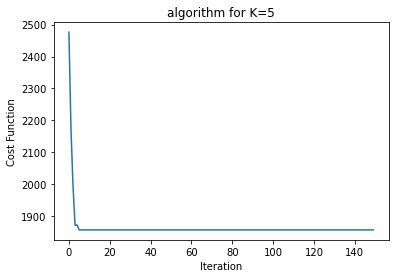

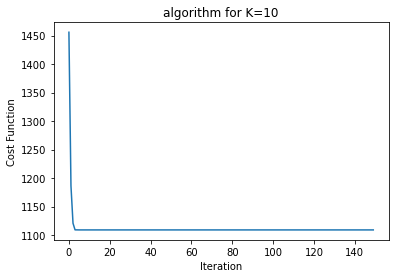

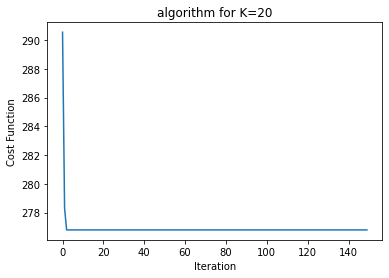

In [164]:
plt.plot(final_cost1)
plt.xlabel('Iteration')
plt.ylabel('Cost Function')
plt.title('algorithm for K=5')
plt.show()

plt.plot(final_cost2)
plt.xlabel('Iteration')
plt.ylabel('Cost Function')
plt.title('algorithm for K=10')

plt.show()


plt.plot(final_cost3)
plt.xlabel('Iteration')
plt.ylabel('Cost Function')
plt.title('algorithm for K=20')

plt.show()



### PART B

In [165]:
metricW1=[]
metricB1=[]
metricW2=[]
metricB2=[]
metricW3=[]
metricB3=[]
for i in range(30):
    W1_data,B1_data,final_cost1_data=Kmeans_algorithm(5,X,20)
    W2_data,B2_data,final_cost2_data=Kmeans_algorithm(10,X,20)
    W3_data,B3_data,final_cost3_data=Kmeans_algorithm(20,X,20)
    metricW1.append(W1_data)
    metricW2.append(W2_data)
    metricW3.append(W3_data)
    metricB1.append(B1_data)
    metricB2.append(B2_data)
    metricB3.append(B3_data)




#### print result :Metric W

In [166]:
mean1=np.mean(metricW1)  
standard_deviation1=np.std(metricW1)    

mean2=np.mean(metricW2)  
standard_deviation2=np.std(metricW2)    

mean3=np.mean(metricW3)  
standard_deviation3=np.std(metricW3)    

    
    
print("K=5  mean is:",mean1)
print("K=5  std is:",standard_deviation1)

print("K=10  mean is:",mean2)
print("K=10  std is:",standard_deviation2)

print("K=20  mean is:",mean3)
print("K=20  std is:",standard_deviation3)

K=5  mean is: 1920.8022181235456
K=5  std is: 307.5212789954384
K=10  mean is: 888.198041151194
K=10  std is: 239.58866576480509
K=20  mean is: 327.5125900229687
K=20  std is: 40.12166610839808


#### print result Metric W/B

In [167]:
res1 = list(map(truediv,metricW1,metricB1))
res2 = list(map(truediv,metricW2,metricB2))
res3 = list(map(truediv,metricW3,metricB3))


mean1=np.mean(res1)  
standard_deviation1=np.std(res1)    

mean2=np.mean(res2)  
standard_deviation2=np.std(res2)    

mean3=np.mean(res3)  
standard_deviation3=np.std(res3)    

    
    
print("K=5  mean is:",mean1)
print("K=5  std is:",standard_deviation1)

print("K=10  mean is:",mean2)
print("K=10  std is:",standard_deviation2)

print("K=20  mean is:",mean3)
print("K=20  std is:",standard_deviation3)

K=5  mean is: 0.15696740811362997
K=5  std is: 0.03085031125028835
K=10  mean is: 0.06698247131484449
K=10  std is: 0.019525205533771777
K=20  mean is: 0.023586440300000303
K=20  std is: 0.002963662652091988
